###  Eksempel med reelle egenverdier

En dominant egenverdi, $\lambda_1 > 1 , (\text{mens} \, \lambda_2 < 1) $

Uansett startvektor $\,\mathbf{u}_0 \,$ så vil vektoren $\,\mathbf{u}_n = A^n \mathbf{u}_0 \,$ nærme seg aksen bestemt av egenvektor $\,\mathbf{v}_1 \,$ når n øker (, men $\,|\mathbf{u}_n|\rightarrow \infty \,$ siden $\lambda_1 > 1$ )

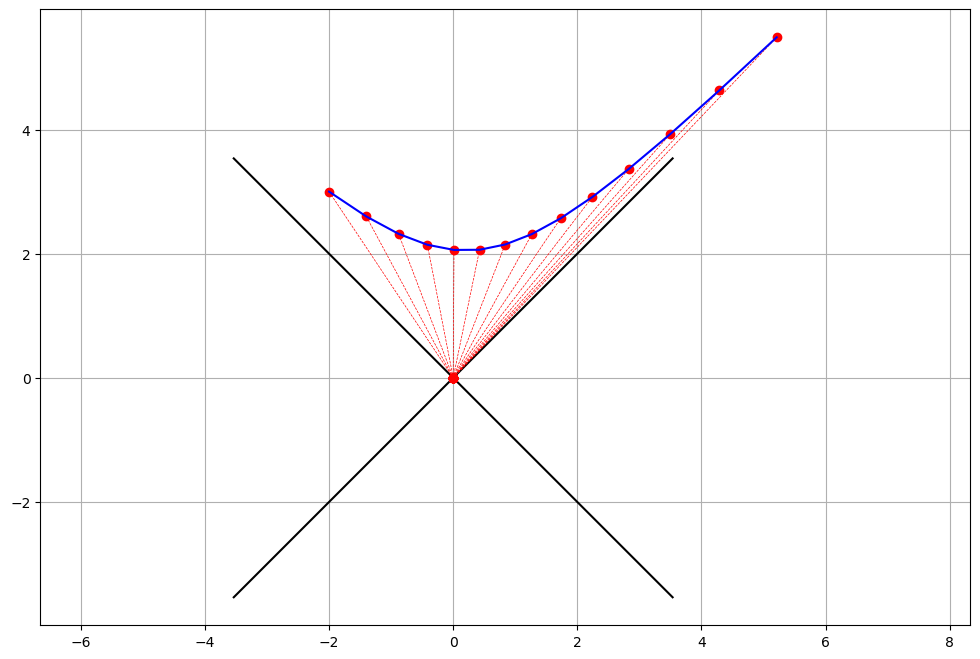

In [19]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1,0.2],[0.2,1]])   # Transformasjonsmatrise
L,P = np.linalg.eig(A)

n = 14                            # (n-1) er antall multiplikasjoner med A
M = np.zeros((2,n))

u0 = np.array([-2,3])             # Vilkårlig startvektor
M[:,0] = u0
v1_akse = 5*P @ np.array([[-1,1],[0,0]])     # Aksene i egenvektorbasisen
v2_akse = 5*P @ np.array([[0,0],[-1,1]])

ax,fig = plt.subplots(figsize=(12,8))
plt.plot(v1_akse[0,:],v1_akse[1,:],'k')
plt.plot(v2_akse[0,:],v2_akse[1,:],'k')

plt.plot([0,u0[0]],[0,u0[1]],'ro--',linewidth=0.5)

for i in range(1,n):
    ui = np.linalg.matrix_power(A,i) @ u0
    plt.plot([0,ui[0]],[0,ui[1]],'ro--',linewidth=0.5)
    M[:,i] = ui

plt.plot(M[0,:],M[1,:],'b')
plt.grid()
plt.axis('equal')
plt.show()

### Eksempel med komplekskonjugerte egenverdier

I dette eksempelet gir matrisen $k\cdot A$ en rotasjon med vinkel $\theta = 45^\circ \text{ og skalering med faktor } c = |\lambda|$ 

Hvis vi regner ut $\,\mathbf{u}_n = (kA)^n \mathbf{u}_0 \,\text{, for } n=1,2,3,\dots \,$ vil trajektoren være en 

1. Sirkelbane hvis  $\,k=\frac{1}{\sqrt{2}} \quad \Rightarrow \quad |{\lambda}|=1$
2. Spiralbevegelse innover (mot origo) hvis  $\,k<\frac{1}{\sqrt{2}} \quad \Rightarrow \quad |{\lambda}|<1$
3. Spiralbevegelse utover hvis $\,k>\frac{1}{\sqrt{2}} \quad \Rightarrow \quad |{\lambda}|>1$

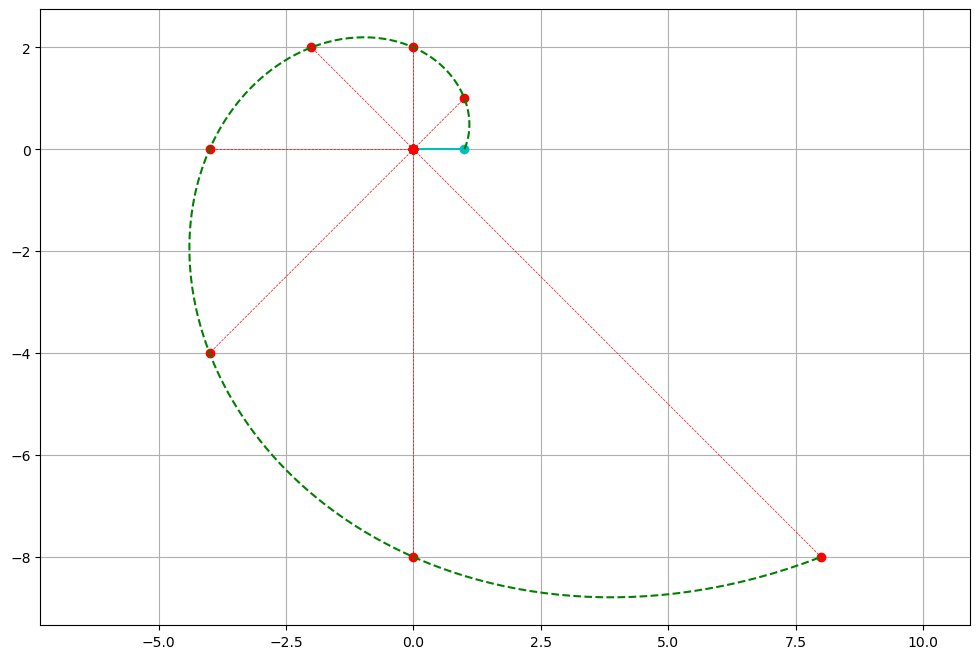

In [24]:
import numpy as np
import matplotlib.pyplot as plt

k = 1
#k = 1/np.sqrt(2)
#k = 1/1.7
A = k*np.array([[1,-1],[1,1]])    # Transformasjonsmatrisen

n = 8                                 
u0 = np.array([1,0])               # Startvektor

L,P = np.linalg.eig(A)
lam = L[0]                        # 1.egenverdi

ax,fig = plt.subplots(figsize=(12,8))
plt.plot([0,u0[0]],[0,u0[1]],'co-')         # plotter startvektoren

for i in range(1,n):
    ui = np.linalg.matrix_power(A,i) @ u0   
    plt.plot([0,ui[0]],[0,ui[1]],'ro--',linewidth =0.5)      # punktplot av un = A^n * u0
    
t = np.linspace(0,n-1,200)
theta = np.angle(lam)
trajektor = np.power(abs(lam),t)*np.array([np.cos(t*(theta)),np.sin(t*(theta))])
plt.plot(trajektor[0,:],trajektor[1,:],'g--')
    
plt.grid()
plt.axis('equal')
plt.show()

### Nytt eksempel med komplekse egenverdier

B og C-matrise iht. teorem 5.5.1

I dette talleksempelet:

1. Hvis  $\,k=1 \quad \Rightarrow \quad |{\lambda}|=1 \quad \quad$ "Elliptisk bane"
2. Hvis  $\,k>1  \quad \Rightarrow \quad |{\lambda}|>1 \quad \quad$ Spiralbevegelse utover
3. Hvis  $\,0<k<1 \quad \Rightarrow \quad |{\lambda}|<1 \quad \quad$ Spiralbevegelse innover

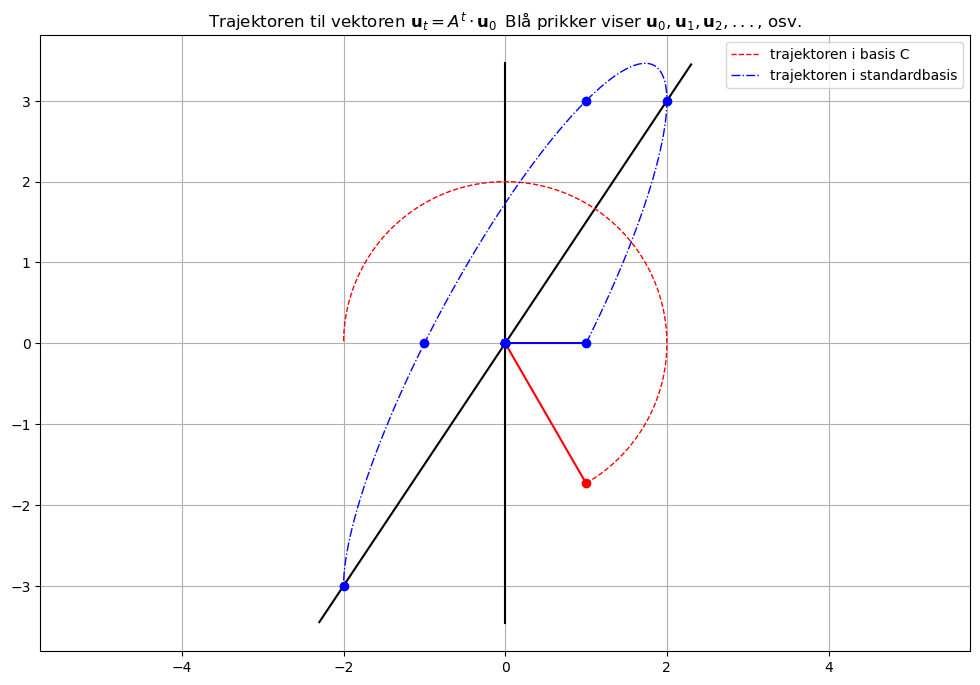

In [45]:
import numpy as np
import matplotlib.pyplot as plt

k = 1
A = k*np.array([[2,-1],[3,-1]])     # Transformasjonsmatrisen
L = np.linalg.eigvals(A)
lambda1 = L[1]
p,q = np.real(lambda1), np.imag(lambda1)

B = np.array([[p,q],[-q,p]])         # Theorem 5.5.1  (Rotasjon + skalering i basis C)

Q = A - lambda1*np.eye(2)            # Note 5.5.3
v1 = np.array([-Q[0,1],Q[0,0]])      # Note 5.5.3
C = np.array([np.real(v1),np.imag(v1)]).T    # Theorem 5.5.1  (Vektorene i C danner en ny basis)


n =5                            # (n-1) = antall multiplikasjoner med A
u0 = np.array([1,0])            # Vilkårlig valgt startvektor i standardbasis
u0c = np.linalg.inv(C) @ u0     # Tilsvarende vektor i basis C

v1_akse = 2.3*C @ np.array([[-1,1],[0,0]])    # Akser bestemt av retningen på vektorene i C
v2_akse = 4*C @ np.array([[0,0],[-1,1]])      #  -"-

ax,fig = plt.subplots(figsize=(12,8))

plt.plot(v1_akse[0,:],v1_akse[1,:],'k')
plt.plot(v2_akse[0,:],v2_akse[1,:],'k')

plt.plot([0,u0[0]],[0,u0[1]],'bo-')        # Plotter startvektoren (standard)
plt.plot([0,u0c[0]],[0,u0c[1]],'ro-')      # ditto i basis C

for i in range(1,n):
    ui = np.linalg.matrix_power(A,i) @ u0
    uic = np.linalg.matrix_power(B,i) @ u0c
    plt.plot([0,ui[0]],[0,ui[1]],'bo',linewidth=0.5)  # Punktvis plot av u0, A*u0, A^2*u0, osv...


t = np.linspace(0,n-1,100)
theta = np.angle(L[0])
magnitude = np.abs(lambda1)
a,b = u0c[0],u0c[1]
trajC = np.power(magnitude,t)*np.array([a*np.cos(theta*t)-b*np.sin(theta*t),a*np.sin(theta*t)+b*np.cos(theta*t)])
plt.plot(trajC[0,:],trajC[1,:],'r--',linewidth=1,label='trajektoren i basis C')
traj = C @ trajC
plt.plot(traj[0,:],traj[1,:],'b-.',linewidth=1,label='trajektoren i standardbasis')

plt.grid()
plt.axis('equal')
plt.legend()
plt.title('Trajektoren til vektoren $\mathbf{u}_t=A^t\cdot \mathbf{u}_0 \,$ Blå prikker viser $\mathbf{u}_0,\mathbf{u}_1,\mathbf{u}_2,...$, osv. ')
plt.show()

###  Eksempel med positiv stokastisk matrise

Markedsandeler i prosent
      År  Firma 1  Firma 2  Firma 3
0    0.0     70.0     20.0     10.0
1    1.0     55.0     25.0     21.0
2    2.0     45.0     28.0     27.0
3    3.0     38.0     31.0     31.0
4    4.0     33.0     33.0     34.0
5    5.0     31.0     34.0     35.0
6    6.0     29.0     36.0     36.0
7    7.0     27.0     37.0     36.0
8    8.0     27.0     37.0     36.0
9    9.0     26.0     38.0     36.0
10  10.0     26.0     38.0     36.0


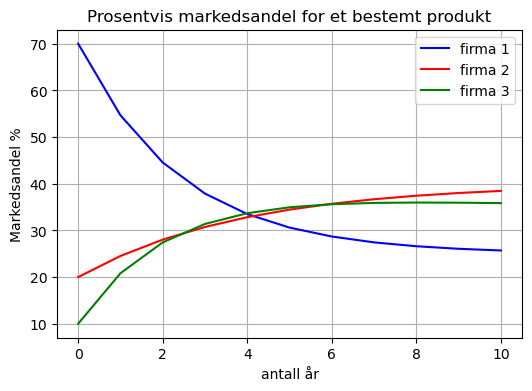

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


A = np.array([[0.94,0.02,0.02],[0.02,0.97,0.02],[0.04,0.01,0.96]])

u0 = np.array([70,20,10])
n = 11
un = np.zeros((3,n))
aar = np.zeros(n)

for k in np.arange(0,n):
    aar[k] = k
    un[:,k] = np.linalg.matrix_power(A,5*k) @ u0

print('Markedsandeler i prosent')
tabell = np.array([aar, un[0,:], un[1,:], un[2,:]]).T
df = pd.DataFrame(np.round(tabell,0), columns = ['År','Firma 1','Firma 2','Firma 3'])
print(df)


x,fig = plt.subplots(figsize=(6,4))
plt.plot(aar,un[0,:],'b',label='firma 1')
plt.plot(aar,un[1,:],'r',label='firma 2')
plt.plot(aar,un[2,:],'g',label='firma 3')
plt.title('Prosentvis markedsandel for et bestemt produkt')
plt.xlabel('antall år')
plt.ylabel('Markedsandel %')
plt.legend()
plt.grid()
plt.show()